<a href="https://colab.research.google.com/github/Geetanjally/NLP/blob/main/10_Word_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WORD EMBEDDING**

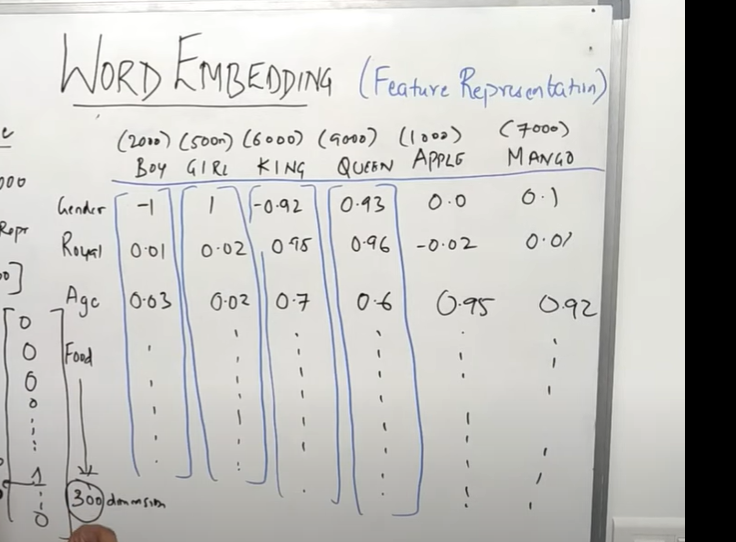

# **Word Embedding:**
Word embedding is a Natural Language Processing (NLP) technique in which words are represented as low-dimensional, dense vectors in a continuous vector space, such that semantically similar words are placed close to each other. Unlike one-hot encoding, which represents each word as a sparse, high-dimensional vector with a single 1 and the rest 0s (carrying no semantic meaning), word ***embeddings capture both syntactic and semantic relationships between words***, making them more efficient and meaningful for machine learning models.

### In this **(word Embedding)** we have low dimension and dense matrix whereas in one hot Represenation we have high dimension and sparce matrix

COSINE SIMILARITY IS HEAVILY USED IN RECOMMENDATION SYSTEM ALSO AND NLP ALSO.

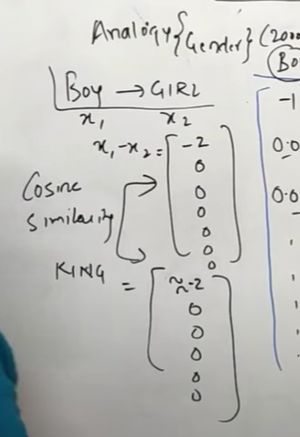

with the help of the cosine similarity we find the similarity/analogy between 2 vectors

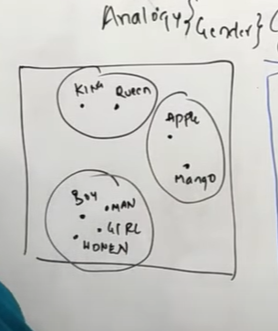

as in above feature extraction we have 3000 vectors as we reduce it to 200 * 200 with the help of the dimension reduction techniques,Than we can see the above mentioned image, we can than easily see the analogy between the vectors like which vector is related to which vectors

# **Word Embedding techniques using Embedding Layer In Keras**

In [ ]:
# Libraries used Tensorflow >2.0 and keras

In [ ]:
#Diff with tensorflow < 2.0
#Here keras is not integrated with tensorflow thus you need to install tensorflow and keras seperately here
#you need to use given below syntax to use functions under keras

# from keras.preprocessing.text import one_hot

In [ ]:
#tensorflow > 2.0
#Here Keras is integrated within Tensorflow
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer

In [ ]:
### sentences
sent = [
    "I love fashion",
    "This dress is beautiful",
    "I hate boring clothes",
    "Ugly shirt not nice",
    "Trendy outfit is amazing"
]

labels = [1, 1, 0, 0, 1]   # 1 = positive, 0 = negative

In [ ]:
sent

['I love fashion',
 'This dress is beautiful',
 'I hate boring clothes',
 'Ugly shirt not nice',
 'Trendy outfit is amazing']

In [ ]:
# Vocabulary Size
# It keeps only the top vocab_size words (like the top 10,000).
# So, the “most common words” come directly from your dataset, chosen by the
# tokenizer based on word frequency.
vocab_size=10000

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size)

tokenizer.fit_on_texts(sent) #Training Phase
print(tokenizer.word_index)  #Dictionary
X = tokenizer.texts_to_sequences(sent)#Transformation Phase

{'i': 1, 'is': 2, 'love': 3, 'fashion': 4, 'this': 5, 'dress': 6, 'beautiful': 7, 'hate': 8, 'boring': 9, 'clothes': 10, 'ugly': 11, 'shirt': 12, 'not': 13, 'nice': 14, 'trendy': 15, 'outfit': 16, 'amazing': 17}


In [ ]:
# fit_on_texts trains the tokenizer by learning a vocabulary ({'word': index}) from the dataset,Builds a dictionary: word → index based on frequency.
# texts_to_sequences then applies this mapping, converting each sentence into a list of integers.
# For example, "I love AI" → [2, 3, 1] using the learned dictionary.

In [ ]:
#OneHotRepresentation is providing the index from the dictionary
one_hot_repr=[one_hot(word,vocab_size)for word in sent]
print(one_hot_repr)

#The output is the the index of the given word in dictionary

[[4719, 4505, 4643], [812, 7626, 9613, 3816], [4719, 4406, 7899, 6367], [6326, 5927, 9330, 5519], [5836, 7203, 9613, 4049]]


### **Word Embedding Representation**

In [ ]:
# Understand Guyz whenever you want to pass anything to the embedding layers ,
# all the sentences should have same numbers of words because that is going to
# help us to make very good embedding matrix.

#pad_sequence:- Its helps to make all the sentences with same number of words.(it is v.v. imp)

In [ ]:
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [ ]:
import numpy as np

In [ ]:
sent_length=8
embedded_docs=pad_sequences(one_hot_repr,padding="pre",maxlen=sent_length) #padding can be "post"
print(embedded_docs)

[[   0    0    0    0    0 4719 4505 4643]
 [   0    0    0    0  812 7626 9613 3816]
 [   0    0    0    0 4719 4406 7899 6367]
 [   0    0    0    0 6326 5927 9330 5519]
 [   0    0    0    0 5836 7203 9613 4049]]


In [ ]:
# First define embedding dimension (features), then add it inside your
# Sequential model before RNN/LSTM layers.

In [ ]:
#Features
# the model learns 10 features per word (instead of 1-hot encoding where each word is just a big sparse vector).
dim=10

In [ ]:
#making model with embedded layer and than compiling
model = Sequential()
model.add(Embedding(vocab_size,10,input_length=sent_length))
model.compile("adam","mse")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#We need to train first than predict
print(model.predict(embedded_docs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
[[[ 2.2904206e-02 -3.8056958e-02 -2.5952661e-02  2.7887832e-02
   -3.1182170e-03  2.4677429e-02 -3.7918746e-02 -4.1451305e-04
   -4.5338478e-02 -4.3294635e-02]
  [ 2.2904206e-02 -3.8056958e-02 -2.5952661e-02  2.7887832e-02
   -3.1182170e-03  2.4677429e-02 -3.7918746e-02 -4.1451305e-04
   -4.5338478e-02 -4.3294635e-02]
  [ 2.2904206e-02 -3.8056958e-02 -2.5952661e-02  2.7887832e-02
   -3.1182170e-03  2.4677429e-02 -3.7918746e-02 -4.1451305e-04
   -4.5338478e-02 -4.3294635e-02]
  [ 2.2904206e-02 -3.8056958e-02 -2.5952661e-02  2.7887832e-02
   -3.1182170e-03  2.4677429e-02 -3.7918746e-02 -4.1451305e-04
   -4.5338478e-02 -4.3294635e-02]
  [ 2.2904206e-02 -3.8056958e-02 -2.5952661e-02  2.7887832e-02
   -3.1182170e-03  2.4677429e-02 -3.7918746e-02 -4.1451305e-04
   -4.5338478e-02 -4.3294635e-02]
  [-2.8704537e-02  4.8093025e-02  3.0032482e-02  4.5799170e-02
    2.5001835e-02  5.9500225e-03  4.6677817e-02 -4.2360689e-02
   -7.9357736e-03 -4.7753848e-02]
 

In [ ]:
#Embedded form of first sentence
embedded_docs[0]

array([   0,    0,    0,    0,    0, 4719, 4505, 4643], dtype=int32)

In [ ]:
#Relation with 10 dim(features) shown of first sentence
print(model.predict(embedded_docs)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[ 0.02290421 -0.03805696 -0.02595266  0.02788783 -0.00311822  0.02467743
  -0.03791875 -0.00041451 -0.04533848 -0.04329463]
 [ 0.02290421 -0.03805696 -0.02595266  0.02788783 -0.00311822  0.02467743
  -0.03791875 -0.00041451 -0.04533848 -0.04329463]
 [ 0.02290421 -0.03805696 -0.02595266  0.02788783 -0.00311822  0.02467743
  -0.03791875 -0.00041451 -0.04533848 -0.04329463]
 [ 0.02290421 -0.03805696 -0.02595266  0.02788783 -0.00311822  0.02467743
  -0.03791875 -0.00041451 -0.04533848 -0.04329463]
 [ 0.02290421 -0.03805696 -0.02595266  0.02788783 -0.00311822  0.02467743
  -0.03791875 -0.00041451 -0.04533848 -0.04329463]
 [-0.02870454  0.04809302  0.03003248  0.04579917  0.02500184  0.00595002
   0.04667782 -0.04236069 -0.00793577 -0.04775385]
 [-0.00318408  0.01763207 -0.0384305  -0.00294753  0.04668609  0.0493157
   0.01587186  0.00375825 -0.00572563  0.00787017]
 [-0.04792185  0.04516843  0.01467067 -0.03137726 -0.03802886  0.02574139
   0.03886551 

# **AFTER TRAINING**

In [ ]:
X=pad_sequences(X,padding="pre",maxlen=sent_length)
y = np.array(labels)
print(X)

[[ 0  0  0  0  0  1  3  4]
 [ 0  0  0  0  5  6  2  7]
 [ 0  0  0  0  1  8  9 10]
 [ 0  0  0  0 11 12 13 14]
 [ 0  0  0  0 15 16  2 17]]


In [ ]:
dim=10

In [ ]:
# LSTM(16) adds a recurrent layer with 16 memory cells. It takes the embedded text sequence and outputs a
# 16-dimensional feature vector representing the whole sentence (useful for classification).
models=Sequential()
models.add(Embedding(vocab_size,10,input_length=sent_length))
models.add(LSTM(16))
models.add(Dense(1, activation='sigmoid'))
models.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
models.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("Predictions before training:")
print(models.predict(X))

Predictions before training:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
[[0.50237846]
 [0.50400734]
 [0.5034515 ]
 [0.50116414]
 [0.50114185]]


In [ ]:
print("Predictions before training:")
print(models.predict(X)[0])

Predictions before training:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[0.50237846]


In [ ]:
models.fit(X, y, epochs=20, verbose=0)

In [ ]:
print("Predictions after training:")
print(models.predict(X))

Predictions after training:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.55575216]
 [0.5603344 ]
 [0.53889304]
 [0.5326233 ]
 [0.5555141 ]]


In [ ]:
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
#Read this amazing blog